In [2]:
#Jupyter notebook to check if imports work correctly
%matplotlib inline
import sys
sys.path.append('./src')
import HubbardEvolutionChain as hc
import ClassicalHubbardEvolutionChain as chc
import FullClassicalHubbardEvolutionChain as fhc
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info import Operator
from qiskit.tools.monitor import job_monitor
from qiskit.tools.jupyter import *
import qiskit.visualization as qvis
import random as rand
import scipy.linalg as la

provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import rcParams
rcParams['text.usetex'] = True


def get_bin(x, n=0):
    """
    Get the binary representation of x.
    Parameters: x (int), n (int, number of digits)"""
    binry = format(x, 'b').zfill(n)
    sup = list( reversed( binry[0:int(len(binry)/2)] ) )
    sdn = list( reversed( binry[int(len(binry)/2):len(binry)] ) )
    return format(x, 'b').zfill(n)

ibmqfactory.load_account:WARNING:2021-05-31 19:26:50,959: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
#==========Set Parameters of the System=============#
dt = 0.25 #Delta t
T = 5.
time_steps = int(T/dt)
t = 1.0  #Hopping parameter
#t = [1.0, 2.]
U = 2.  #On-Site repulsion
#time_steps = 10
nsites = 3
trotter_slices = 10
initial_state = np.array([1, 4])

#Run simulation
run_results1 = hc.sys_evolve(nsites, initial_state, T, dt, t, U, 10)
run_results2 = hc.sys_evolve(nsites, initial_state, T, dt, t, U, 40)
run_results3, eng3 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 60)
run_results4 = hc.sys_evolve(nsites, initial_state, T, dt, t, U, 90)
#print(True if np.isscalar(initial_state) else False)
'''
#Fidelity measurements
#run_results1, engs1 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 10)
run_results2 = hc.sys_evolve_den(nsites, initial_state, T, dt, t, U, 40)
#run_results3, engs3 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 100)
#run_results4, engs4 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 150)
#Collect data on how Trotter steps change energy range
trotter_range = [10, 20, 30, 40, 50, 60, 70, 80]
eng_range = []
#engs = []
#runs = []

for trot_step in trotter_range:
    run_results3, eng3 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, trot_step)
    runs.append(run_results3[:,-1])
    eng_range.append(np.ptp(eng3))
    engs.append(eng3)
'''

Num Steps:  20
Total Time:  5.0
Job Status: job has successfully run
{'010010': 8192}
Job:  1  of  20  complete.
Job Status: job has successfully run
{'100100': 29, '001001': 30, '001100': 26, '010100': 456, '010010': 6342, '100010': 407, '001010': 451, '100001': 30, '010001': 421}
Job:  2  of  20  complete.
Job Status: job has successfully run
{'001001': 381, '010100': 871, '001100': 344, '010001': 927, '010010': 3171, '100001': 334, '100100': 362, '100010': 859, '001010': 943}
Job:  3  of  20  complete.
Job Status: job has successfully run
{'001100': 1024, '001010': 622, '100010': 550, '010010': 1658, '001001': 1101, '010100': 566, '100100': 1044, '100001': 1022, '010001': 605}
Job:  4  of  20  complete.
Job Status: job has successfully run
{'010100': 104, '001010': 105, '100010': 99, '001100': 1520, '001001': 1837, '100001': 1438, '010010': 1506, '010001': 97, '100100': 1486}
Job:  5  of  20  complete.
Job Status: job has successfully run
{'010100': 310, '010010': 765, '010001': 342

Job Status: job has successfully run
Total Energy is:  2.1357421875
Job:  2  of  20  complete
Job:  3  of  20  computing energy...
Job Status: job has successfully run
Job Status: job has successfully run
Total Energy is:  2.582763671875
Job:  3  of  20  complete
Job:  4  of  20  computing energy...
Job Status: job has successfully run
Job Status: job has successfully run
Total Energy is:  2.592529296875
Job:  4  of  20  complete
Job:  5  of  20  computing energy...
Job Status: job has successfully run
Job Status: job has successfully run
Total Energy is:  2.42333984375
Job:  5  of  20  complete
Job:  6  of  20  computing energy...
Job Status: job has successfully run
Job Status: job has successfully run
Total Energy is:  2.4366455078125
Job:  6  of  20  complete
Job:  7  of  20  computing energy...
Job Status: job has successfully run
Job Status: job has successfully run
Total Energy is:  2.52783203125
Job:  7  of  20  complete
Job:  8  of  20  computing energy...
Job Status: job has 

'\n#Fidelity measurements\n#run_results1, engs1 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 10)\nrun_results2 = hc.sys_evolve_den(nsites, initial_state, T, dt, t, U, 40)\n#run_results3, engs3 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 100)\n#run_results4, engs4 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, 150)\n#Collect data on how Trotter steps change energy range\ntrotter_range = [10, 20, 30, 40, 50, 60, 70, 80]\neng_range = []\n#engs = []\n#runs = []\n\nfor trot_step in trotter_range:\n    run_results3, eng3 = hc.sys_evolve_eng(nsites, initial_state, T, dt, t, U, trot_step)\n    runs.append(run_results3[:,-1])\n    eng_range.append(np.ptp(eng3))\n    engs.append(eng3)\n'

Time Steps:  20  Step Size:  0.25


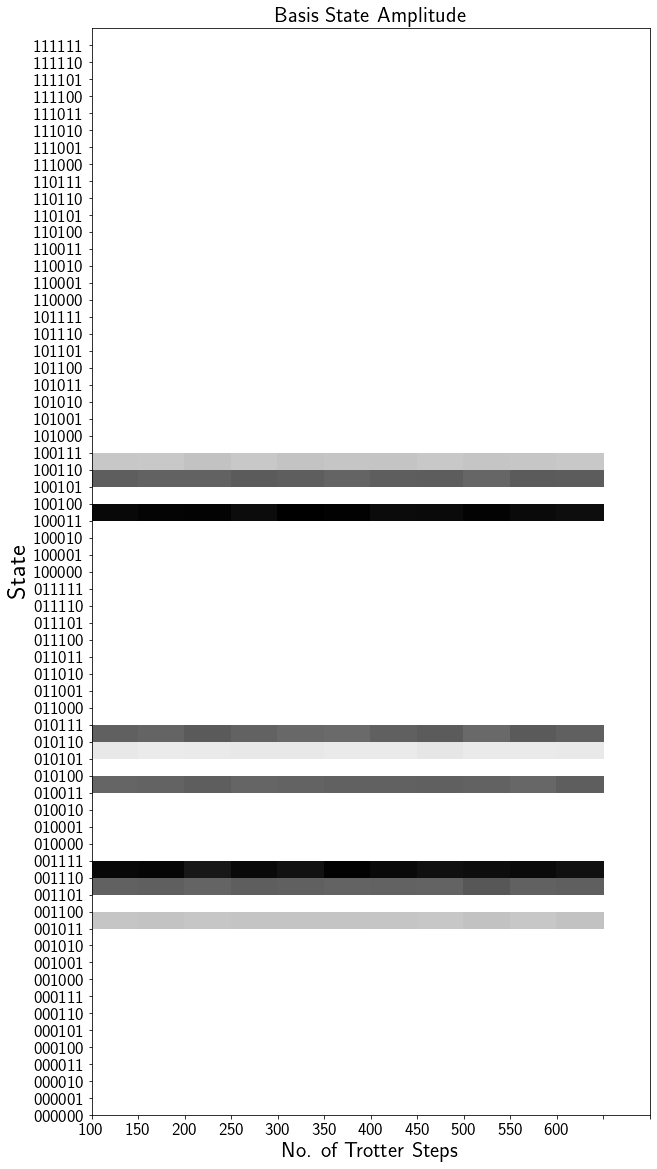

In [33]:
#sample_run = run_results3[:,-1]
#print(sample_run)
#print(run_results3[:,-1],'   ',len(run_results3[:,-1]))
#print(tp_run[-1],'    ',len(tp_run[-1]))

#Plot the raw data as a colormap
#xticks = np.arange(2**(nsites*2))
xlabels=[]
print("Time Steps: ",time_steps, " Step Size: ",dt)
for i in range(2**(nsites*2)):
    xlabels.append(hc.get_bin(i,6))
    
fig, ax = plt.subplots(figsize=(10,20))
c = ax.pcolor(np.transpose(runs), cmap='binary')
ax.set_title('Basis State Amplitude', fontsize=22)
plt.yticks(np.arange(2**(nsites*2)), xlabels, size=18)
plt.xticks(np.arange(0,13), trotter_range, size=18)
ax.set_xlabel('No. of Trotter Steps', fontsize=22)
ax.set_ylabel('State', fontsize=26)
plt.show()

#plt.plot(trotter_range, eng_range)
#plt.xlabel('No. of Trotter Steps', fontsize=18)
#plt.ylabel('Energy Range', fontsize=18)

In [3]:
proc_data = np.zeros([2*nsites, len(trotter_range)])
runs_array = np.array(runs)
for step in range(0,len(trotter_range)):
    for i in range(0,2**(2*nsites)):
        num = ''.join( list( reversed(hc.get_bin(i,2*nsites)) ) )
        #print('i: ', i,'    step: ',step)
        for mode in range(len(num)):
            if num[mode]=='1':
                proc_data[mode, step] += runs_array[step, i]
    norm = 0.
    for mode in range(len(num)):
        norm += proc_data[mode, step]
    proc_data[:,step] = proc_data[:,step] / norm
    
print(proc_data[0,:])

IndexError: too many indices for array

In [3]:
#============ Run Classical Evolution ==============#

#Define our basis states
#States for 3 electrons with net spin up
'''
states = [ [[1,1,0],[1,0,0]], [[1,1,0],[0,1,0]], [[1,1,0], [0,0,1]],
           [[1,0,1],[1,0,0]], [[1,0,1],[0,1,0]], [[1,0,1], [0,0,1]],
           [[0,1,1],[1,0,0]], [[0,1,1],[0,1,0]], [[0,1,1], [0,0,1]] ]
'''
#States for 2 electrons in singlet state

states = [ [[1,0,0],[1,0,0]], [[1,0,0],[0,1,0]], [[1,0,0],[0,0,1]],
           [[0,1,0],[1,0,0]], [[0,1,0],[0,1,0]], [[0,1,0],[0,0,1]],
           [[0,0,1],[1,0,0]], [[0,0,1],[0,1,0]], [[0,0,1],[0,0,1]] ]
#'''
#States for a single electron
#states = [ [[1,0,0],[0,0,0]], [[0,1,0],[0,0,0]], [[0,0,1],[0,0,0]] ]


#Possible initial wavefunctions
#wfk = [0., 0., 0., 0., 1., 0., 0., 0., 0.] #Half-filling initial state (101010)
wfk = [0., 0., 0., 0., 1.0, 0., 0., 0., 0.] #2 electron initial state (010010)
#wfk = [0., 0., 0., 0., 0., 1., 0., 0., 0.] #2 electron initial state (010001)
#wfk = [0., -1., 0.] #1 electron initial state

#System parameters
t = 1.0
U = 2.
classical_time_step = 0.01
classical_total_time = 500*0.01
times = np.arange(0., classical_total_time, classical_time_step)




states = fhc.get_states(numsites)
evolution, engs = chc.sys_evolve(states, wfk, t, U, classical_total_time, classical_time_step)
print(evolution[-25])

NameError: name 'numsites' is not defined

In [4]:
#System parameters
t = 1.0
U = 2.
classical_time_step = 0.01
classical_total_time = 500*0.01
times = np.arange(0., classical_total_time, classical_time_step)
states = fhc.get_states(nsites)
#print(states)
#print(states[64])
wfk_full = np.zeros(len(states), dtype=np.complex_)
target_state = [[0,1], [0,0]]
target_index = 0
for l in range(len(states)):
    if len(target_state) == sum([1 for i, j in zip(target_state, states[l]) if i == j]):
        print('Target state found at: ',l)
        target_index = l

wfk_full[18] = 1.    #010010
#wfk_full[21] = 1.    #010101
#wfk_full[42] = 1.    #101010
#wfk_full[2] = 1.   #000010
#wfk_full[target_index] = 1.
#wfk_full[2] = 0.5 - 0.5*1j
#wfk_full[0] = 1/np.sqrt(2)
print(wfk_full)
evolution, engs, wfks = fhc.sys_evolve(states, wfk_full, t, U, classical_total_time, classical_time_step)


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


./src/FullClassicalHubbardEvolutionChain.py:211: ComplexWarning: Casting complex values to real discards the imaginary part
  evolve[0] = np.multiply(np.conj(wfk), wfk)
./src/FullClassicalHubbardEvolutionChain.py:219: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[0] = wfk_energy(wfk, hamiltonian)
./src/FullClassicalHubbardEvolutionChain.py:231: ComplexWarning: Casting complex values to real discards the imaginary part
  evolve[t] = np.multiply(np.conj(wfk), wfk)
./src/FullClassicalHubbardEvolutionChain.py:232: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[t] = wfk_energy(wfk, hamiltonian)


In [68]:
#print(wfks[-26])
#print(run_results1[-1])
tst = np.outer(np.conj(wfks[-25]),wfks[-25])
#print(times[-25])
#print(np.shape(tst))

def fidelity(numerical_density, quantum_density):
    sqrt_quantum = la.sqrtm(quantum_density)
    fidelity_matrix = np.matmul(sqrt_quantum, np.matmul(numerical_density,sqrt_quantum))
    fidelity_matrix = la.sqrtm(fidelity_matrix)
    trace = np.trace(fidelity_matrix)
    trace2 = np.conj(trace)*trace
    
    #Try tr(rho*sigma)+sqrt(det(rho)*det(sigma))
    fidelity = np.trace(np.matmul(numerical_density, quantum_density)) + np.sqrt(np.linalg.det(numerical_density)*np.linalg.det(quantum_density))
    return fidelity

print("Fidelity")
print( fidelity( run_results2[-1], tst) )
print('============================')
print('Trace')
print('Numerical: ',np.trace(tst))
print('Quantum: ',np.trace(run_results2[-1]))
print('============================')
print('Square Trace')
print('Numerical: ',np.trace(np.matmul(tst, tst)))
print('Quantum: ',np.trace(np.matmul(run_results2[-1], run_results2[-1])))
print('============================')
fidelities = []
fidelities.append(fidelity(tst, run_results1[-1]))
fidelities.append(fidelity(tst, run_results2[-1]))
fidelities.append(fidelity(tst, run_results3[-1]))
fidelities.append(fidelity(tst, run_results4[-1]))
trotters = [10, 40, 100, 150]
plt.plot(trotters, fidelities)

Fidelity
(0.41946433368780844-2.4645838492596456e-34j)
Trace
Numerical:  (1.0000000000000553+0j)
Quantum:  (1.0000000000000244-2.8888949165808538e-34j)
Square Trace
Numerical:  (1.0000000000001108+0j)
Quantum:  (1.0000000000000504+1.6544941696595124e-33j)


NameError: name 'run_results1' is not defined

In [ ]:
#Calculate RootMeanSquare
rms = np.zeros(len(trotter_range))

for trotter_index in range(len(trotter_range)):
    sq_diff = 0.
    for mode in range(2*nsites):
        sq_diff += (evolution[-25, mode] - proc_data[mode, trotter_index])**2
    rms[trotter_index] = np.sqrt(sq_diff / 2*nsites)

plt.plot(trotter_range, rms)
plt.xlabel('Trotter Steps', fontsize=14)
plt.ylabel('RMS',fontsize=14)
plt.title('RMS for 1 Electrons 010000', fontsize=14)

NameError: name 'proc_data' is not defined

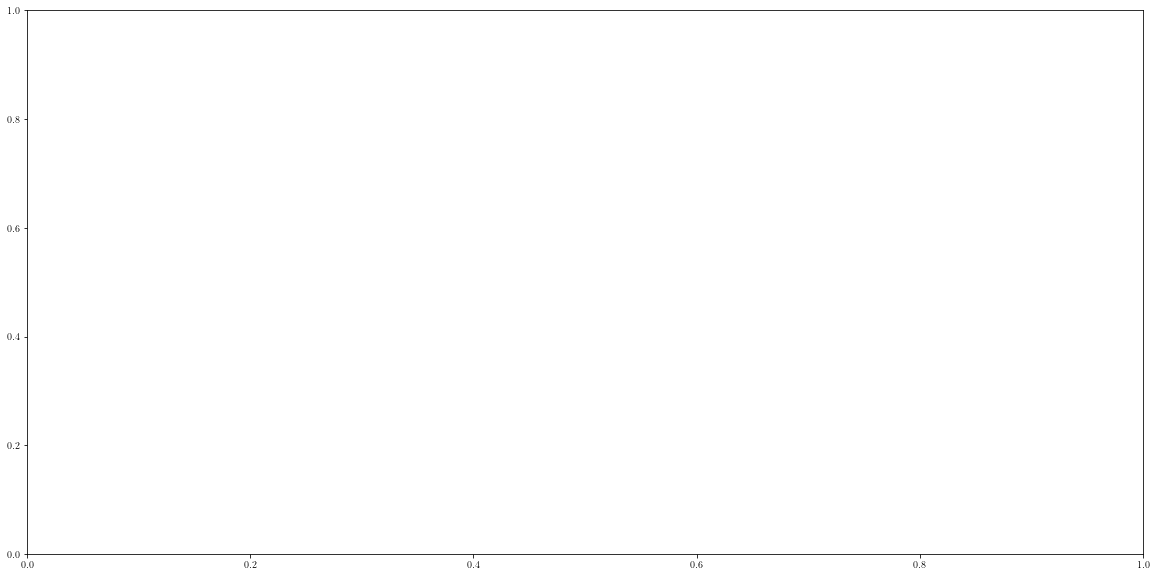

In [23]:
#Create plots of the processed data
fig2, ax2 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())

for i in range(nsites):
    #Create string label
    strup = "Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Site "+str(i+1)+r'$\downarrow$'
    ax2.plot(trotter_range, proc_data[i,:], marker="^", color=str(colors[i]), label=strup)
    ax2.plot(trotter_range, proc_data[i+nsites,:], marker="v", linestyle='--', color=str(colors[i]), label=strdwn)
    ax2.plot(trotter_range, np.full(len(trotter_range), evolution[-1, i]), linestyle='-', color=str(colors[i]),label=strup)
    ax2.plot(trotter_range, np.full(len(trotter_range), evolution[-1, i+nsites]), linestyle='-', color=str(colors[i]),label=strdwn)


#ax2.set_ylim(0, 0.55)
#ax2.set_xlim(0, time_steps*dt+dt/2.)
#ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.2))
#ax2.set_yticks(np.arange(0,0.55, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Probability Convergence for 3 electrons', fontsize=22)
ax2.set_xlabel('Number of Trotter Steps', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999999]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


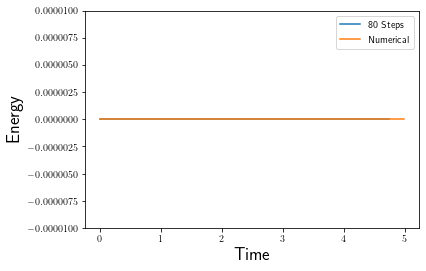

In [55]:
processed_data3 = hc.process_run(nsites, time_steps, dt, run_results3)
tdat = np.arange(0.,T, dt)
norm_dat = [np.sum(x) for x in np.transpose(processed_data3)]
print(norm_dat)
print(eng3)
#plt.plot(norm_dat)
plt.plot(tdat, eng3, label='80 Steps')
plt.plot(times, engs, label='Numerical')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Energy',fontsize=18)
plt.ylim(-1e-5, 1e-5)
plt.legend()
print(np.ptp(eng3))

In [ ]:
## ============ Run Classical Evolution ==============

#Define our basis states
#States for 3 electrons with net spin up
'''
states = [ [[1,1,0],[1,0,0]], [[1,1,0],[0,1,0]], [[1,1,0], [0,0,1]],
           [[1,0,1],[1,0,0]], [[1,0,1],[0,1,0]], [[1,0,1], [0,0,1]],
           [[0,1,1],[1,0,0]], [[0,1,1],[0,1,0]], [[0,1,1], [0,0,1]] ]
'''
#States for 2 electrons in singlet state

states = [ [[1,0,0],[1,0,0]], [[1,0,0],[0,1,0]], [[1,0,0],[0,0,1]],
           [[0,1,0],[1,0,0]], [[0,1,0],[0,1,0]], [[0,1,0],[0,0,1]],
           [[0,0,1],[1,0,0]], [[0,0,1],[0,1,0]], [[0,0,1],[0,0,1]] ]
#'''
#States for a single electron
#states = [ [[1,0,0],[0,0,0]], [[0,1,0],[0,0,0]], [[0,0,1],[0,0,0]] ]


#Possible initial wavefunctions
#wfk = [0., 0., 0., 0., 1., 0., 0., 0., 0.] #Half-filling initial state
wfk = [0., 0., 0., 0., 1.0, 0., 0., 0., 0.] #2 electron initial state
#wfk = [0., 1., 0.] #1 electron initial state

#System parameters for evolving system numerically
t = 1.0
U = 2.
classical_time_step = 0.01
classical_total_time = 500*0.01
times = np.arange(0., classical_total_time, classical_time_step)

evolution, engs = chc.sys_evolve(states, wfk, t, U, classical_total_time, classical_time_step)

#Get norms and energies as a function of time.  Round to 10^-12
norms = np.array([np.sum(x) for x in evolution])
norms = np.around(norms, 12)
engs = np.around(engs, 12)


Text(0, 0.5, 'Normalization')

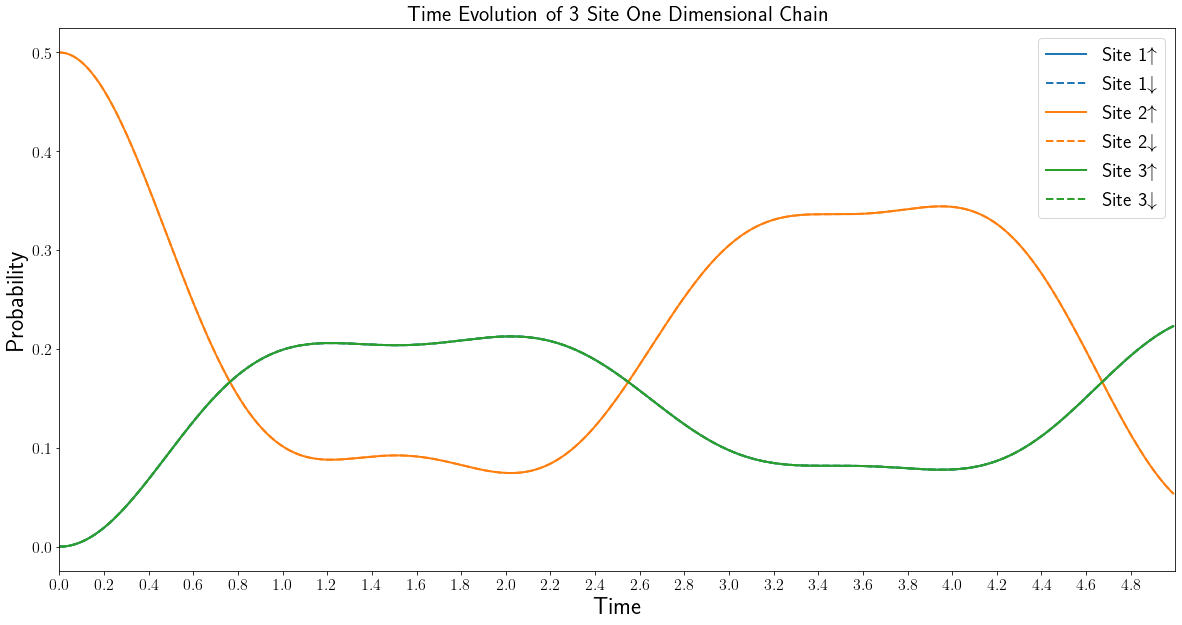

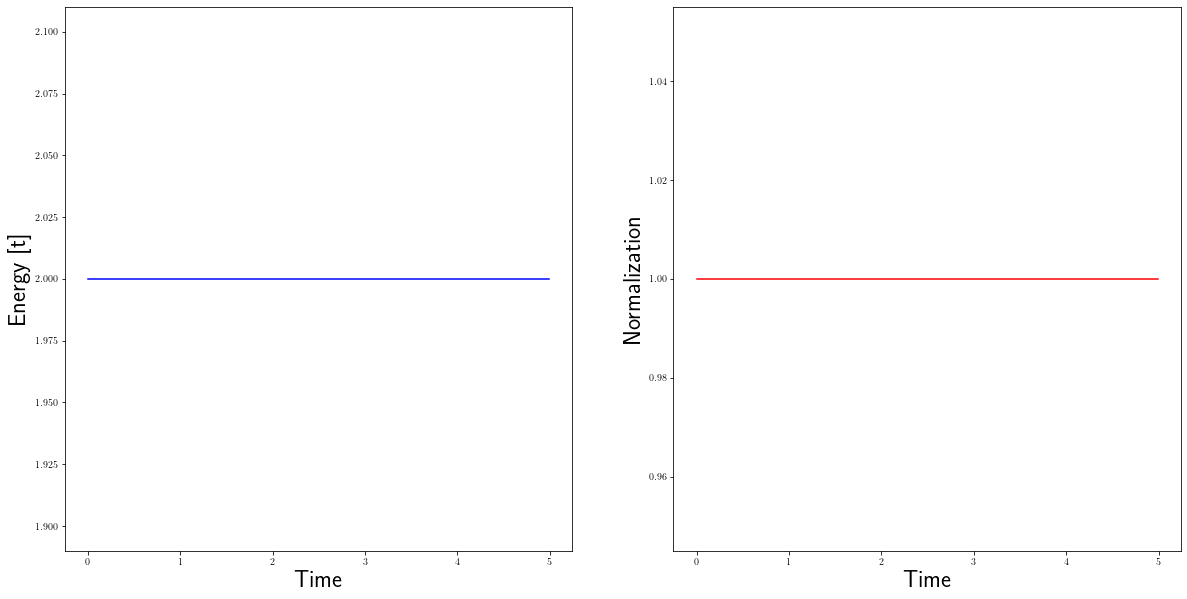

In [29]:
#Create plots of the processed data
fig2, ax2 = plt.subplots(figsize=(20,10))
fig3, ax3 = plt.subplots(1, 2, figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())
cos = np.cos(np.sqrt(2)*times)**2

sit1 = "Site "+str(1)+r'$\uparrow$'
sit2 = "Site "+str(2)+r'$\uparrow$'
sit3 = "Site "+str(3)+r'$\uparrow$'
#ax2.plot(times, evolve[:,0], marker='.', color='k', linewidth=2, label=sit1)
#ax2.plot(times, evolve[:,1], marker='.', color=str(colors[0]), linewidth=2, label=sit2)
#ax2.plot(times, evolve[:,2], marker='.', color=str(colors[1]), linewidth=1.5, label=sit3)
#ax2.plot(times, cos, label='cosdat')
#ax2.plot(times, np.zeros(len(times)))

for i in range(3):
    #Create string label
    strup = "Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Site "+str(i+1)+r'$\downarrow$'
    ax2.plot(times, evolution[:,i], linestyle='-', color=str(colors[i]), linewidth=2, label=strup)
    ax2.plot(times, evolution[:,i+3], linestyle='--', color=str(colors[i]), linewidth=2, label=strdwn)




#ax2.set_ylim(0, 1.)
ax2.set_xlim(0, classical_total_time)
#ax2.set_xlim(0, 1.)
ax2.set_xticks(np.arange(0,classical_total_time, 0.2))
#ax2.set_yticks(np.arange(0,1.1, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)


#Plot energy and normalization
ax3[0].plot(times, engs, color='b')
ax3[1].plot(times, norms, color='r')
ax3[0].set_xlabel('Time', fontsize=24)
ax3[0].set_ylabel('Energy [t]', fontsize=24)
ax3[1].set_xlabel('Time', fontsize=24)
ax3[1].set_ylabel('Normalization', fontsize=24)


In [9]:
print(evolution)

NameError: name 'evolution' is not defined

No handles with labels found to put in legend.
No handles with labels found to put in legend.


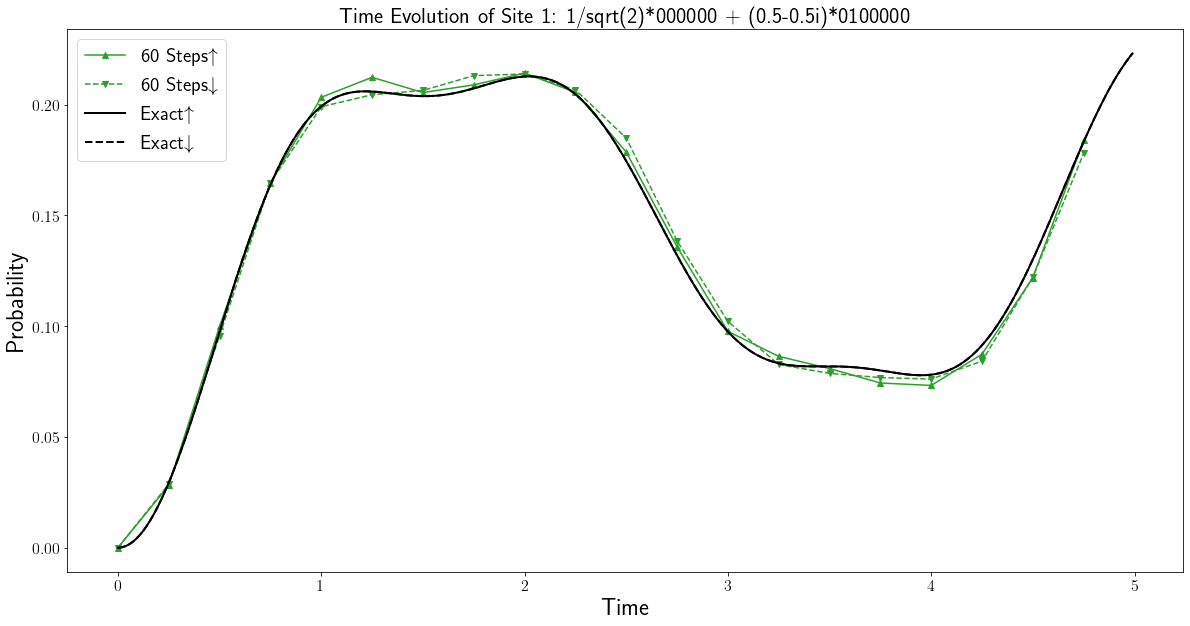

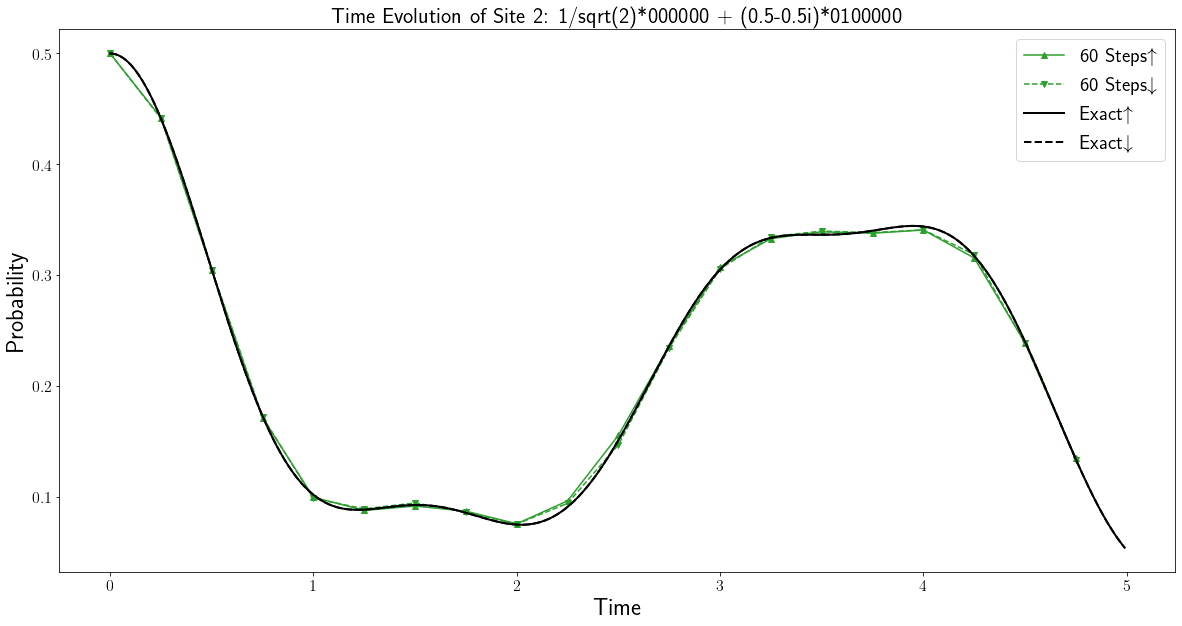

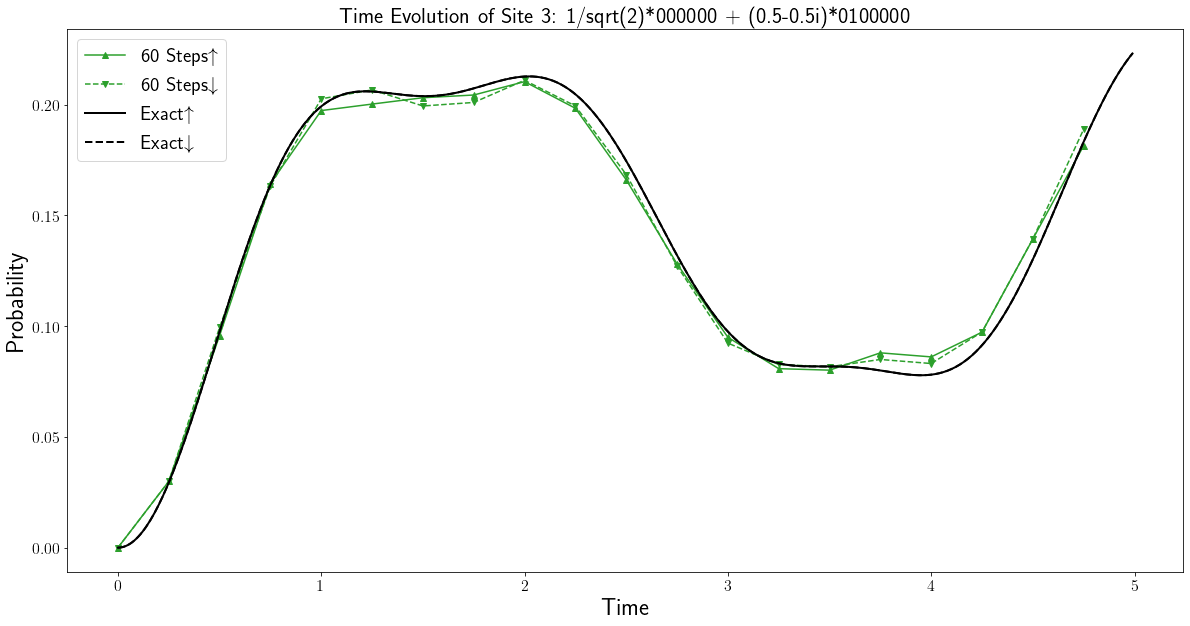

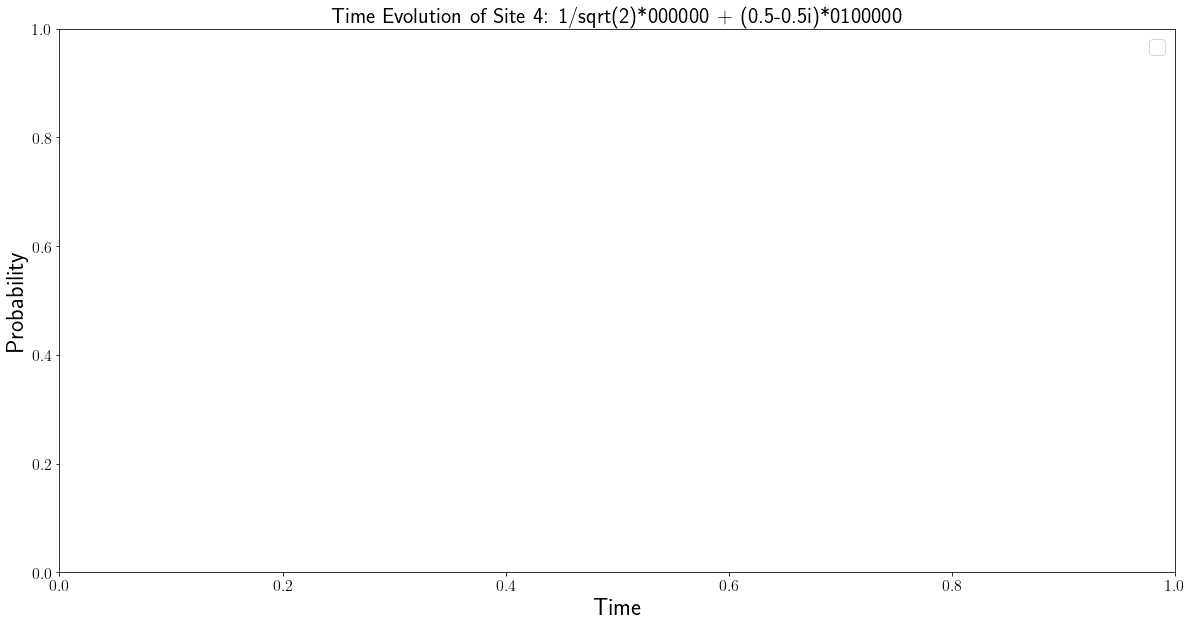

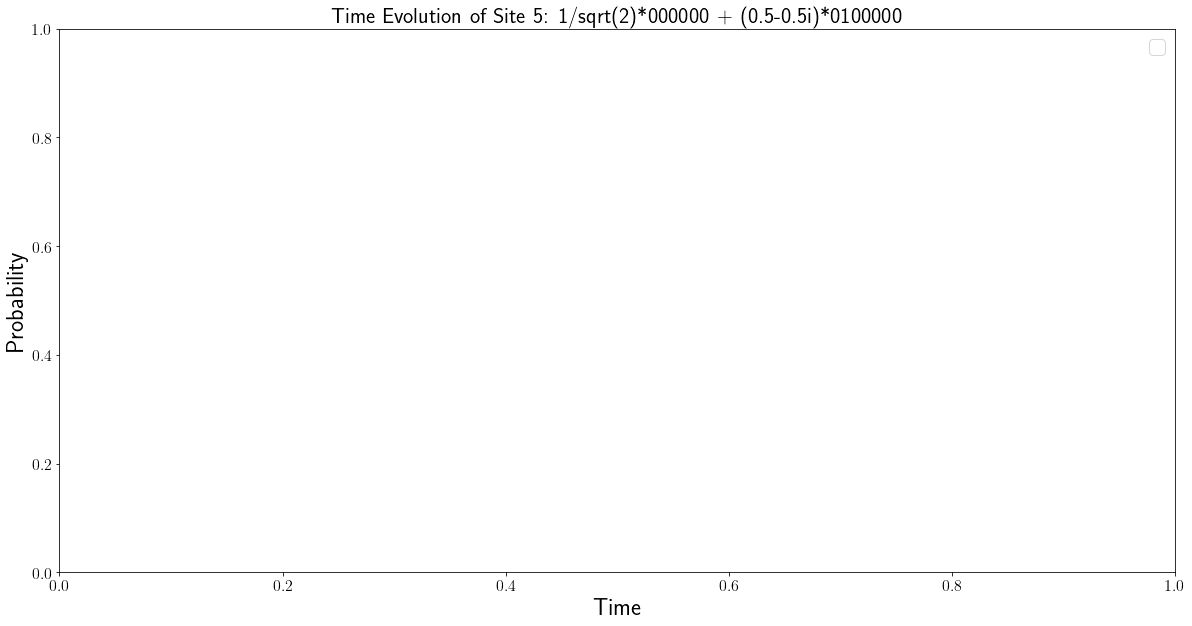

In [5]:
#processed_data1 = hc.process_run(nsites, time_steps, dt, run_results1)
#processed_data2 = hc.process_run(nsites, time_steps, dt, run_results2)
processed_data3 = hc.process_run(nsites, time_steps, dt, run_results3)
#processed_data4 = hc.process_run(nsites, time_steps, dt, run_results4)
timesq = np.arange(0, time_steps*dt, dt)
#Create plots of the processed data
#fig0, ax0 = plt.subplots(figsize=(20,10))
fig1, ax1 = plt.subplots(figsize=(20,10))
fig2, ax2 = plt.subplots(figsize=(20,10))
fig3, ax3 = plt.subplots(figsize=(20,10))
fig4, ax4 = plt.subplots(figsize=(20,10))
fig5, ax5 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())

'''
#Plot energies
ax0.plot(timesq, eng1, color=str(colors[0]), label='10 Steps')
ax0.plot(timesq, eng2, color=str(colors[1]), label='20 Steps')
ax0.plot(timesq, eng3, color=str(colors[2]), label='40 Steps')
ax0.plot(timesq, eng4, color=str(colors[3]), label='60 Steps')
ax0.legend(fontsize=20)
ax0.set_xlabel("Time", fontsize=24)
ax0.set_ylabel("Total Energy", fontsize=24)
ax0.tick_params(labelsize=16)
'''

#Site 1
strup = "10 Steps"+r'$\uparrow$'
strdwn = "10 Steps"+r'$\downarrow$'
#ax1.plot(timesq, processed_data1[0,:], marker="^", color=str(colors[0]), label=strup)
#ax1.plot(timesq, processed_data1[0+nsites,:], linestyle='--', marker="v", color=str(colors[0]), label=strdwn)
strup = "40 Steps"+r'$\uparrow$'
strdwn = "40 Steps"+r'$\downarrow$'
#ax1.plot(timesq, processed_data2[0,:], marker="^", color=str(colors[1]), label=strup)
#ax1.plot(timesq, processed_data2[0+nsites,:], linestyle='--', marker="v", color=str(colors[1]), label=strdwn)
strup = "60 Steps"+r'$\uparrow$'
strdwn = "60 Steps"+r'$\downarrow$'
ax1.plot(timesq, processed_data3[0,:], marker="^", color=str(colors[2]), label=strup)
ax1.plot(timesq, processed_data3[0+nsites,:],linestyle='--', marker="v", color=str(colors[2]), label=strdwn)
strup = "100 Steps"+r'$\uparrow$'
strdwn = "100 Steps"+r'$\downarrow$'
#ax1.plot(timesq, processed_data3[0,:], marker="^", color=str(colors[3]), label=strup)
#ax1.plot(timesq, processed_data3[0+nsites,:], linestyle='--', marker="v", color=str(colors[3]), label=strdwn)
strup = "Exact"+r'$\uparrow$'
strdwn = "Exact"+r'$\downarrow$'
#1e numerical evolution
ax1.plot(times, evolution[:,0], linestyle='-', color='k', linewidth=2, label=strup)
ax1.plot(times, evolution[:,0+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)
#2e+ numerical evolution
#ax1.plot(times, mode_evolve[:,0], linestyle='-', color='k', linewidth=2, label=strup)
#ax1.plot(times, mode_evolve[:,0+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)


#Site 2
strup = "10 Steps"+r'$\uparrow$'
strdwn = "10 Steps"+r'$\downarrow$'
#ax2.plot(timesq, processed_data1[1,:], marker="^", color=str(colors[0]), label=strup)
#ax2.plot(timesq, processed_data1[1+nsites,:], marker="v", linestyle='--',color=str(colors[0]), label=strdwn)
strup = "40 Steps"+r'$\uparrow$'
strdwn = "40 Steps"+r'$\downarrow$'
#ax2.plot(timesq, processed_data2[1,:], marker="^", color=str(colors[1]), label=strup)
#ax2.plot(timesq, processed_data2[1+nsites,:], marker="v", linestyle='--',color=str(colors[1]), label=strdwn)
strup = "60 Steps"+r'$\uparrow$'
strdwn = "60 Steps"+r'$\downarrow$'
ax2.plot(timesq, processed_data3[1,:], marker="^", color=str(colors[2]), label=strup)
ax2.plot(timesq, processed_data3[1+nsites,:], marker="v", linestyle='--', color=str(colors[2]), label=strdwn)
strup = "100 Steps"+r'$\uparrow$'
strdwn = "100 Steps"+r'$\downarrow$'
#ax2.plot(timesq, processed_data4[1,:], marker="^", color=str(colors[3]), label=strup)
#ax2.plot(timesq, processed_data4[1+nsites,:], marker="v", linestyle='--', color=str(colors[3]), label=strdwn)
#1e numerical evolution
strup = "Exact"+r'$\uparrow$'
strdwn = "Exact"+r'$\downarrow$'
ax2.plot(times, evolution[:,1], linestyle='-', color='k', linewidth=2, label=strup)
ax2.plot(times, evolution[:,1+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)
#2e+ numerical evolution
#ax2.plot(times, mode_evolve[:,1], linestyle='-', color='k', linewidth=2, label=strup)
#ax2.plot(times, mode_evolve[:,1+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)

#Site 3
strup = "10 Steps"+r'$\uparrow$'
strdwn = "10 Steps"+r'$\downarrow$'
#ax3.plot(timesq, processed_data1[2,:], marker="^", color=str(colors[0]), label=strup)
#ax3.plot(timesq, processed_data1[2+nsites,:], marker="v", linestyle='--', color=str(colors[0]), label=strdwn)
strup = "40 Steps"+r'$\uparrow$'
strdwn = "40 Steps"+r'$\downarrow$'
#ax3.plot(timesq, processed_data2[2,:], marker="^", color=str(colors[1]), label=strup)
#ax3.plot(timesq, processed_data2[2+nsites,:], marker="v", linestyle='--', color=str(colors[1]), label=strdwn)
strup = "60 Steps"+r'$\uparrow$'
strdwn = "60 Steps"+r'$\downarrow$'
ax3.plot(timesq, processed_data3[2,:], marker="^", color=str(colors[2]), label=strup)
ax3.plot(timesq, processed_data3[2+nsites,:], marker="v", linestyle='--', color=str(colors[2]), label=strdwn)
strup = "100 Steps"+r'$\uparrow$'
strdwn = "100 Steps"+r'$\downarrow$'

#ax3.plot(timesq, processed_data4[2,:], marker="^", color=str(colors[3]), label=strup)
#ax3.plot(timesq, processed_data4[2+nsites,:], marker="v", linestyle='--', color=str(colors[3]), label=strdwn)
#1e numerical evolution
strup = "Exact"+r'$\uparrow$'
strdwn = "Exact"+r'$\downarrow$'
ax3.plot(times, evolution[:,2], linestyle='-', color='k', linewidth=2, label=strup)
ax3.plot(times, evolution[:,2+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)
#2e+ numerical evolution
#ax3.plot(times, mode_evolve[:,2], linestyle='-', color='k', linewidth=2, label=strup)
#ax3.plot(times, mode_evolve[:,2+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)


#Site 4
r'''
strup = "10 Steps"+r'$\uparrow$'
strdwn = "10 Steps"+r'$\downarrow$'

#ax4.plot(timesq, processed_data1[3,:], marker="^", color=str(colors[0]), label=strup)
#ax4.plot(timesq, processed_data1[3+nsites,:], marker="v", linestyle='--', color=str(colors[0]), label=strdwn)
strup = "40 Steps"+r'$\uparrow$'
strdwn = "40 Steps"+r'$\downarrow$'
#ax4.plot(timesq, processed_data2[3,:], marker="^", color=str(colors[1]), label=strup)
#ax4.plot(timesq, processed_data2[3+nsites,:], marker="v", linestyle='--', color=str(colors[1]), label=strdwn)
strup = "150 Steps"+r'$\uparrow$'
strdwn = "150 Steps"+r'$\downarrow$'
ax4.plot(timesq, processed_data3[3,:], marker="^", color=str(colors[2]), label=strup)
ax4.plot(timesq, processed_data3[3+nsites,:], marker="v", linestyle='--', color=str(colors[2]), label=strdwn)
strup = "100 Steps"+r'$\uparrow$'
strdwn = "100 Steps"+r'$\downarrow$'
#ax4.plot(timesq, processed_data4[3,:], marker="^", color=str(colors[3]), label=strup)
#ax4.plot(timesq, processed_data4[3+nsites,:], marker="v", linestyle='--', color=str(colors[3]), label=strdwn)
#1e numerical evolution
strup = "Exact"+r'$\uparrow$'
strdwn = "Exact"+r'$\downarrow$'
ax4.plot(times, evolution[:,3], linestyle='-', color='k', linewidth=2, label=strup)
ax4.plot(times, evolution[:,3+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)

#2e+ numerical evolution
#ax3.plot(times, mode_evolve[:,2], linestyle='-', color='k', linewidth=2, label=strup)
#ax3.plot(times, mode_evolve[:,2+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)



#Site 5
strup = "10 Steps"+r'$\uparrow$'
strdwn = "10 Steps"+r'$\downarrow$'
ax5.plot(timesq, processed_data1[4,:], marker="^", color=str(colors[0]), label=strup)
ax5.plot(timesq, processed_data1[4+nsites,:], marker="v", linestyle='--', color=str(colors[0]), label=strdwn)
strup = "40 Steps"+r'$\uparrow$'
strdwn = "40 Steps"+r'$\downarrow$'
#ax5.plot(timesq, processed_data2[4,:], marker="^", color=str(colors[1]), label=strup)
#ax5.plot(timesq, processed_data2[4+nsites,:], marker="v", linestyle='--', color=str(colors[1]), label=strdwn)
strup = "150 Steps"+r'$\uparrow$'
strdwn = "150 Steps"+r'$\downarrow$'
ax5.plot(timesq, processed_data3[4,:], marker="^", color=str(colors[2]), label=strup)
ax5.plot(timesq, processed_data3[4+nsites,:], marker="v", linestyle='--', color=str(colors[2]), label=strdwn)
strup = "100 Steps"+r'$\uparrow$'
strdwn = "100 Steps"+r'$\downarrow$'
#ax5.plot(timesq, processed_data4[4,:], marker="^", color=str(colors[3]), label=strup)
#ax5.plot(timesq, processed_data4[4+nsites,:], marker="v", linestyle='--', color=str(colors[3]), label=strdwn)
#1e numerical evolution
strup = "Exact"+r'$\uparrow$'
strdwn = "Exact"+r'$\downarrow$'
ax5.plot(times, evolution[:,4], linestyle='-', color='k', linewidth=2, label=strup)
ax5.plot(times, evolution[:,4+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)

#2e+ numerical evolution
#ax3.plot(times, mode_evolve[:,2], linestyle='-', color='k', linewidth=2, label=strup)
#ax3.plot(times, mode_evolve[:,2+nsites], linestyle='--', color='k', linewidth=2, label=strdwn)
r'''

#ax2.set_ylim(0, 0.55)
#ax2.set_xlim(0, time_steps*dt+dt/2.)
#ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.2))
#ax2.set_yticks(np.arange(0,0.55, 0.05))
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax3.tick_params(labelsize=16)
ax4.tick_params(labelsize=16)
ax5.tick_params(labelsize=16)
ax1.set_title(r"Time Evolution of Site 1: 1/sqrt(2)*000000 + (0.5-0.5i)*0100000", fontsize=22)
ax2.set_title(r"Time Evolution of Site 2: 1/sqrt(2)*000000 + (0.5-0.5i)*0100000", fontsize=22)
ax3.set_title(r"Time Evolution of Site 3: 1/sqrt(2)*000000 + (0.5-0.5i)*0100000", fontsize=22)
ax4.set_title(r"Time Evolution of Site 4: 1/sqrt(2)*000000 + (0.5-0.5i)*0100000", fontsize=22)
ax5.set_title(r"Time Evolution of Site 5: 1/sqrt(2)*000000 + (0.5-0.5i)*0100000", fontsize=22)
ax1.set_xlabel('Time', fontsize=24)
ax2.set_xlabel('Time', fontsize=24)
ax3.set_xlabel('Time', fontsize=24)
ax4.set_xlabel('Time', fontsize=24)
ax5.set_xlabel('Time', fontsize=24)
ax1.set_ylabel('Probability', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax3.set_ylabel('Probability', fontsize=24)
ax4.set_ylabel('Probability', fontsize=24)
ax5.set_ylabel('Probability', fontsize=24)
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)
ax4.legend(fontsize=20)
ax5.legend(fontsize=20)



In [2]:
#==== Cell to Implement Energy Measurement Functions ====#
def sys_evolve(nsites, excitations, total_time, dt, hop, U, trotter_steps):
    #Check for correct data types of input
    if not isinstance(nsites, int):
        raise TypeError("Number of sites should be int")
    if np.isscalar(excitations):
        raise TypeError("Initial state should be list or numpy array")
    if not np.isscalar(total_time):
        raise TypeError("Evolution time should be scalar")
    if not np.isscalar(dt):
        raise TypeError("Time step should be scalar")
    if not isinstance(trotter_steps, int):
        raise TypeError("Number of trotter slices should be int")

    numq = 2*nsites
    num_steps = int(total_time/dt)
    print('Num Steps: ',num_steps)
    print('Total Time: ', total_time)
    data = np.zeros((2**numq, num_steps))
    energies = np.zeros(num_steps)
    
    for t_step in range(0, num_steps):
        #Create circuit with t_step number of steps
        q = QuantumRegister(numq)
        c = ClassicalRegister(numq)
        qcirc = QuantumCircuit(q,c)

        #=========USE THIS REGION TO SET YOUR INITIAL STATE==============
          #Loop over each excitation 
        for flip in excitations:
            qcirc.x(flip)
        #===============================================================
    
        qcirc.barrier()
        #Append circuit with Trotter steps needed
        hc.qc_evolve(qcirc, nsites, t_step*dt, hop, U, trotter_steps)
        #Measure the circuit
        for i in range(numq):
            qcirc.measure(i, i)
    
    #Choose provider and backend
        provider = IBMQ.get_provider()
        #backend = Aer.get_backend('statevector_simulator')
        backend = Aer.get_backend('qasm_simulator')
        #backend = provider.get_backend('ibmq_qasm_simulator')
        #backend = provider.get_backend('ibmqx4')
        #backend = provider.get_backend('ibmqx2')
        #backend = provider.get_backend('ibmq_16_melbourne')
        shots = 8192
        max_credits = 10 #Max number of credits to spend on execution
        job_exp = execute(qcirc, backend=backend, shots=shots, max_credits=max_credits)
        #job_monitor(job_exp)
        result = job_exp.result()
        counts = result.get_counts(qcirc)
        #print(result.get_counts(qcirc))
        print("Job: ",t_step+1, " of ", num_steps," computing energy...")
    
    #Store results in data array and normalize them
        for i in range(2**numq):
            if counts.get(get_bin(i,numq)) is None:
                dat = 0
            else:
                dat = counts.get(get_bin(i,numq))
            data[i,t_step] = dat/shots
            
    #=======================================================
        #Compute energy of system
        #Compute repulsion energies
        repulsion_energy = measure_repulsion(U, nsites, counts, shots)
        
        #Compute hopping energies
        #Get list of hopping pairs
        even_pairs = []
        for i in range(0,nsites-1,2):
            #up_pair = [i, i+1]
            #dwn_pair = [i+nsites, i+nsites+1]
            even_pairs.append([i, i+1])
            even_pairs.append([i+nsites, i+nsites+1])
        odd_pairs = []
        for i in range(1,nsites-1,2):
            odd_pairs.append([i, i+1])
            odd_pairs.append([i+nsites, i+nsites+1])
        
        #Start with even hoppings, initialize circuit and find hopping pairs
        q = QuantumRegister(numq)
        c = ClassicalRegister(numq)
        qcirc = QuantumCircuit(q,c)
          #Loop over each excitation 
        for flip in excitations:
            qcirc.x(flip)
        qcirc.barrier()
        #Append circuit with Trotter steps needed
        hc.qc_evolve(qcirc, nsites, t_step*dt, hop, U, trotter_steps)
        even_hopping = measure_hopping(hop, even_pairs, qcirc, numq)
        #===============================================================
        #Now do the same for the odd hoppings
        #Start with even hoppings, initialize circuit and find hopping pairs
        q = QuantumRegister(numq)
        c = ClassicalRegister(numq)
        qcirc = QuantumCircuit(q,c)
          #Loop over each excitation 
        for flip in excitations:
            qcirc.x(flip)
        qcirc.barrier()
        #Append circuit with Trotter steps needed
        hc.qc_evolve(qcirc, nsites, t_step*dt, hop, U, trotter_steps)
        odd_hopping = measure_hopping(hop, odd_pairs, qcirc, numq)
        
        total_energy = repulsion_energy + even_hopping + odd_hopping
        energies[t_step] = total_energy
        print("Total Energy is: ", total_energy)
        print("Job: ",t_step+1, " of ", num_steps," complete")
    return data, energies



#Measure the total repulsion from circuit run
def measure_repulsion(U, num_sites, results, shots):
    repulsion = 0.
    #Figure out how to include different hoppings later
    for state in results:
        for i in range( int( len(state)/2 ) ):
            if state[i]=='1':
                if state[i+num_sites]=='1':
                    repulsion += U*results.get(state)/shots
    
    return repulsion
                    
        

def measure_hopping(hopping, pairs, circuit, num_qubits):
    #Add diagonalizing circuit
    for pair in pairs:
        circuit.cnot(pair[0],pair[1])
        circuit.ch(pair[1],pair[0])
        circuit.cnot(pair[0],pair[1])
        #circuit.measure(pair[0],pair[0])
        #circuit.measure(pair[1],pair[1])
    circuit.measure_all()
    #Run circuit
    backend = Aer.get_backend('qasm_simulator')
    shots = 8192
    max_credits = 10 #Max number of credits to spend on execution
    #print("Computing Hopping")
    hop_exp = execute(circuit, backend=backend, shots=shots, max_credits=max_credits)
    job_monitor(hop_exp)
    result = hop_exp.result()
    counts = result.get_counts(circuit)
    #print(counts)
    #Compute energy
    #print(pairs)
    for pair in pairs:
        hop_eng = 0.
        #print('Pair is: ',pair)
        for state in counts:
            #print('State is: ',state,'   Index at pair[0]: ',num_qubits-1-pair[0],'    Val: ',state[num_qubits-pair[0]])
            if state[num_qubits-1-pair[0]]=='1':
                prob_01 = counts.get(state)/shots
                #print('Check state is: ',state)
                for comp_state in counts:
                    #print('Comp State is: ',state,'   Index at pair[0]: ',num_qubits-1-pair[1],'    Val: ',comp_state[num_qubits-pair[0]])
                    if comp_state[num_qubits-1-pair[1]]=='1':
                        #print('Comp state is: ',comp_state)
                        hop_eng += -hopping*(prob_01 - counts.get(comp_state)/shots)
    return hop_eng


In [5]:
#Try by constructing the matrix and finding the eigenvalues
N = 3
Nup = 2
Ndwn = N - Nup

t = 1.0
U = 2.

#Check if two states are different by a single hop
def hop(psii, psij):
    #Check spin down
    hopp = 0
    if psii[0]==psij[0]:
        #Create array of indices with nonzero values
        indi = np.nonzero(psii[1])[0]
        indj = np.nonzero(psij[1])[0]
        for i in range(len(indi)):
            if abs(indi[i]-indj[i])==1:
                hopp = -t
                return hopp
    #Check spin up
    if psii[1]==psij[1]:
        indi = np.nonzero(psii[0])[0]
        indj = np.nonzero(psij[0])[0]
        for i in range(len(indi)):
            if abs(indi[i]-indj[i])==1:
                hopp = -t
                return hopp
    return hopp
            

#On-site terms
def repel(l,state):
    if state[0][l]==1 and state[1][l]==1:
        return state
    else:
        return []
        
#States for 3 electrons with net spin up
'''
states = [ [[1,1,0],[1,0,0]], [[1,1,0],[0,1,0]], [[1,1,0], [0,0,1]],
           [[1,0,1],[1,0,0]], [[1,0,1],[0,1,0]], [[1,0,1], [0,0,1]],
           [[0,1,1],[1,0,0]], [[0,1,1],[0,1,0]], [[0,1,1], [0,0,1]] ]
'''
#States for 2 electrons in singlet state

states = [ [[1,0,0],[1,0,0]], [[1,0,0],[0,1,0]], [[1,0,0],[0,0,1]],
           [[0,1,0],[1,0,0]], [[0,1,0],[0,1,0]], [[0,1,0],[0,0,1]],
           [[0,0,1],[1,0,0]], [[0,0,1],[0,1,0]], [[0,0,1],[0,0,1]] ]
#'''
#States for a single electron
states = [ [[1,0,0],[0,0,0]], [[0,1,0],[0,0,0]], [[0,0,1],[0,0,0]] ]
#'''
H = np.zeros((len(states),len(states)) )
#Construct Hamiltonian matrix
for i in range(len(states)):
    psi_i = states[i]
    for j in range(len(states)):
        psi_j = states[j]
        
        if j==i:
            for l in range(0,len(states[0][0])):
                if psi_i == repel(l,psi_j):
                    H[i,j] = U
                    break
        else:
            H[i,j] = hop(psi_i, psi_j)

print(H)
results = la.eig(H)
print()
for i in range(len(results[0])):
    print('Eigenvalue: ',results[0][i])
    print('Eigenvector: \n',results[1][i])
    print()

dens_ops = []
eigs = []
for vec in results[1]:
    dens_ops.append(np.outer(results[1][i],results[1][i]))
    eigs.append(results[0][i])
    print(dens_ops)

    
#Loop/function to flip through states
mode_list = []
num_sites = 3
print(len(states[0][0]))
for i in range(0,2*num_sites):
    index_list = []
    for state_index in range(0,len(states)):
        state = states[state_index]
        #print(state[0])
        #print(state[1])
        #Check spin-up modes
        if i < num_sites:
            if state[0][i]==1:
                index_list.append(state_index)
        #Check spin-down modes
        else:
            if state[1][i-num_sites]==1:
                index_list.append(state_index)
    if index_list:
        mode_list.append(index_list)

print(mode_list)

wfk0 = 1/np.sqrt(2)*results[1][0] - 1/np.sqrt(2)*results[1][2]

print(np.dot(np.conj(wfk0), np.dot(H, wfk0)))

[[ 0. -1.  0.]
 [-1.  0. -1.]
 [ 0. -1.  0.]]

Eigenvalue:  (-1.4142135623730951+0j)
Eigenvector: 
 [ 0.5        -0.70710678  0.5       ]

Eigenvalue:  (9.77950359581925e-17+0j)
Eigenvector: 
 [ 7.07106781e-01  9.02056208e-17 -7.07106781e-01]

Eigenvalue:  (1.414213562373095+0j)
Eigenvector: 
 [0.5        0.70710678 0.5       ]

[array([[0.25      , 0.35355339, 0.25      ],
       [0.35355339, 0.5       , 0.35355339],
       [0.25      , 0.35355339, 0.25      ]])]
[array([[0.25      , 0.35355339, 0.25      ],
       [0.35355339, 0.5       , 0.35355339],
       [0.25      , 0.35355339, 0.25      ]]), array([[0.25      , 0.35355339, 0.25      ],
       [0.35355339, 0.5       , 0.35355339],
       [0.25      , 0.35355339, 0.25      ]])]
[array([[0.25      , 0.35355339, 0.25      ],
       [0.35355339, 0.5       , 0.35355339],
       [0.25      , 0.35355339, 0.25      ]]), array([[0.25      , 0.35355339, 0.25      ],
       [0.35355339, 0.5       , 0.35355339],
       [0.25      , 0.353553

In [6]:
dtc = 0.01
tsteps = 500
times = np.arange(0., tsteps*dtc, dtc)

t_op = la.expm(-1j*H*dtc)
#print(np.subtract(np.identity(len(H)), dt*H*1j))
#print(t_op)
#wfk = [0., 0., 0., 0., 1., 0., 0., 0., 0.] #Half-filling initial state
#wfk = [0., 0., 0., 0., 1.0, 0., 0., 0., 0.] #2 electron initial state
wfk = [0., 1., 0.] #1 electron initial state


evolve = np.zeros([tsteps, len(wfk)])
energies = np.zeros(tsteps)
mode_evolve = np.zeros([tsteps, 6])
mode_evolve = np.zeros([tsteps, len(mode_list)])
evolve[0] = wfk
energies[0] = np.dot(np.conj(wfk), np.dot(H, wfk))
print(energies[0])
excitations = 3.
#Loop to find occupation of each mode
for i in range(0,len(mode_list)):
    wfk_sum = 0.
    for j in mode_list[i]:
        wfk_sum += evolve[0][j]
    mode_evolve[0][i] = wfk_sum / excitations

print(mode_evolve)
print('========================================================')
#Figure out how to generalize this later
'''
mode_evolve[0][0] = (evolve[0][0]+evolve[0][1]+evolve[0][2]) /2.
mode_evolve[0][1] = (evolve[0][3]+evolve[0][4]+evolve[0][5]) /2.
mode_evolve[0][2] = (evolve[0][6]+evolve[0][7]+evolve[0][8]) /2.
mode_evolve[0][3] = (evolve[0][0]+evolve[0][3]+evolve[0][6]) /2.
mode_evolve[0][4] = (evolve[0][1]+evolve[0][4]+evolve[0][7]) /2.
mode_evolve[0][5] = (evolve[0][2]+evolve[0][5]+evolve[0][8])  /2.
'''


'''
mode_evolve[0][0] = (evolve[0][0]+evolve[0][1]+evolve[0][2]+evolve[0][3]+evolve[0][4]+evolve[0][5]) /3.
mode_evolve[0][1] = (evolve[0][0]+evolve[0][1]+evolve[0][2]+evolve[0][6]+evolve[0][7]+evolve[0][8]) /3.
mode_evolve[0][2] = (evolve[0][3]+evolve[0][4]+evolve[0][5]+evolve[0][6]+evolve[0][7]+evolve[0][8]) /3.
mode_evolve[0][3] = (evolve[0][0]+evolve[0][3]+evolve[0][6]) /3.
mode_evolve[0][4] = (evolve[0][1]+evolve[0][4]+evolve[0][7]) /3.
mode_evolve[0][5] = (evolve[0][2]+evolve[0][5]+evolve[0][8]) /3.
#'''
#print(mode_evolve[0])
#Define density matrices
print(mode_evolve)
print()
print()

for t in range(1, tsteps):
    #t_op = la.expm(-1j*H*t*dtc)
    wfk = np.dot(t_op, wfk)
    evolve[t] = np.multiply(np.conj(wfk), wfk)
    energies[t] = np.dot(np.conj(wfk), np.dot(H, wfk))
    norm = np.sum(evolve[t])
    #print(evolve[t])
    #Store data in modes rather than basis defined in 'states' variable
    ''' #Procedure for two electrons
    mode_evolve[t][0] = (evolve[t][0]+evolve[t][1]+evolve[t][2]) / (2)
    mode_evolve[t][1] = (evolve[t][3]+evolve[t][4]+evolve[t][5]) / (2)
    mode_evolve[t][2] = (evolve[t][6]+evolve[t][7]+evolve[t][8]) / (2)
    mode_evolve[t][3] = (evolve[t][0]+evolve[t][3]+evolve[t][6]) / (2)
    mode_evolve[t][4] = (evolve[t][1]+evolve[t][4]+evolve[t][7]) / (2)
    mode_evolve[t][5] = (evolve[t][2]+evolve[t][5]+evolve[t][8]) / (2)
     #Procedure for half-filling
    mode_evolve[t][0] = (evolve[t][0]+evolve[t][1]+evolve[t][2]+evolve[t][3]+evolve[t][4]+evolve[t][5]) /3.
    mode_evolve[t][1] = (evolve[t][0]+evolve[t][1]+evolve[t][2]+evolve[t][6]+evolve[t][7]+evolve[t][8]) /3.
    mode_evolve[t][2] = (evolve[t][3]+evolve[t][4]+evolve[t][5]+evolve[t][6]+evolve[t][7]+evolve[t][8]) /3.
    mode_evolve[t][3] = (evolve[t][0]+evolve[t][3]+evolve[t][6]) /3.
    mode_evolve[t][4] = (evolve[t][1]+evolve[t][4]+evolve[t][7]) /3.
    mode_evolve[t][5] = (evolve[t][2]+evolve[t][5]+evolve[t][8]) /3.
    #'''
    #print(mode_evolve[t])
    #print(np.linalg.norm(evolve[t]))
    

#print(len(evolve[:,0]) )
#print(len(times))
#print(evolve[:,0])
#print(min(evolve[:,0]))
print(energies)


0.0
[[0.         0.33333333 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 ...
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
[[0.         0.33333333 0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 ...
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/kaelyn/anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
/home/kaelyn/anaconda3/envs/qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:59: ComplexWarning: Casting complex values to real discards the imaginary part


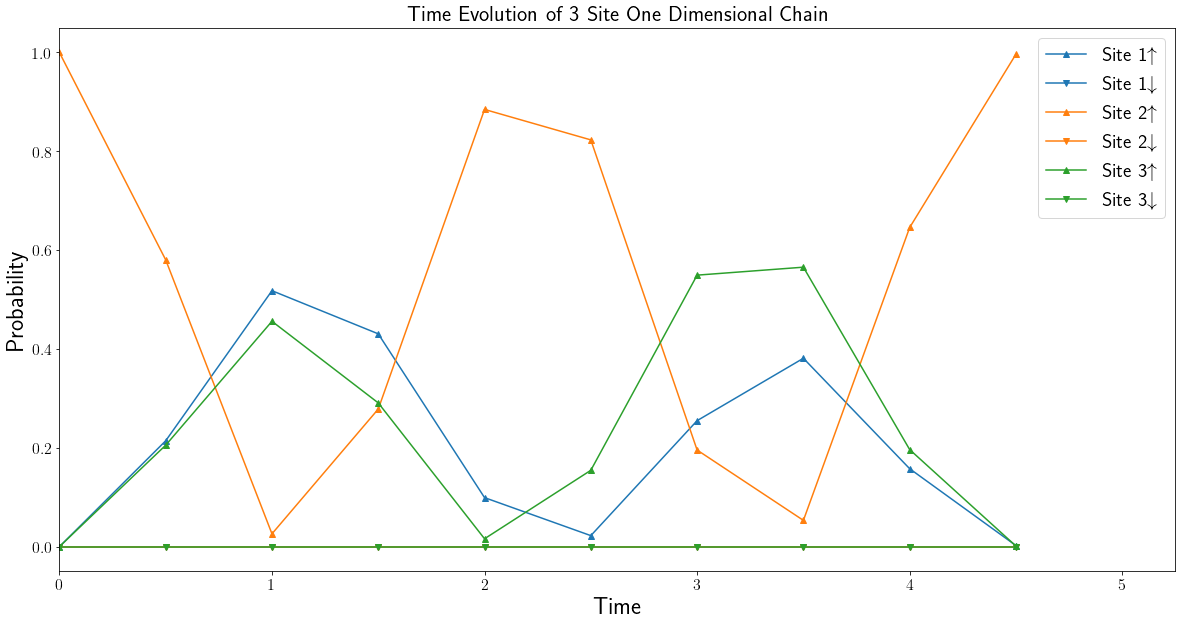

In [6]:

timesq = np.arange(0, time_steps*dt, dt)

for i in range(nsites):
    #Create string label
    strup = "Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Site "+str(i+1)+r'$\downarrow$'
    ax2.plot(timesq, processed_data[i,:], marker="^", color=str(colors[i]), label=strup)
    ax2.plot(timesq, processed_data[i+nsites,:], marker="v", color=str(colors[i]), label=strdwn)


#ax2.set_ylim(0, 0.55)
ax2.set_xlim(0, time_steps*dt+dt/2.)
#ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.2))
#ax2.set_yticks(np.arange(0,0.55, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)


In [ ]:

#Process and plot data
'''The procedure here is, for each fermionic mode, add the probability of every state containing
that mode (at a given time step), and renormalize the data based on the total occupation of each mode.
Afterwards, plot the data as a function of time step for each mode.'''

def process_run(num_sites, time_steps, results):
    proc_data = np.zeros((2*num_sites, time_steps))
    timesq = np.arange(0.,time_steps*dt, dt)

    #Sum over time steps
    for t in range(time_steps):
        #Sum over all possible states of computer
        for i in range(2**(2*num_sites)):
            #num = get_bin(i, 2*nsite)
            num = ''.join( list( reversed(hc.get_bin(i,2*nsites)) ) )
            #For each state, check which mode(s) it contains and add them
            for mode in range(len(num)):
                if num[mode]=='1':
                    proc_data[mode,t] += results[i,t]
    
        #Renormalize these sums so that the total occupation of the modes is 1
        norm = 0.0
        for mode in range(len(num)):
            norm += proc_data[mode,t]
        proc_data[:,t] = proc_data[:,t] / norm
    return proc_data
    
'''
At this point, proc_data is a 2d array containing the occupation 
of each mode, for every time step
'''
processed_data = process_run(nsites, time_steps, run_results)
#Create plots of the processed data
fig2, ax2 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())

for i in range(nsites):
    #Create string label
    strup = "Site "+str(i+1)+r'$\uparrow$'
    strdwn = "Site "+str(i+1)+r'$\downarrow$'
    ax2.plot(timesq, processed_data[i,:], marker="^", color=str(colors[i]), label=strup)
    ax2.plot(timesq, processed_data[i+nsites,:], marker="v", color=str(colors[i]), label=strdwn)


#ax2.set_ylim(0, 0.55)
ax2.set_xlim(0, time_steps*dt+dt/2.)
#ax2.set_xticks(np.arange(0,time_steps*dt+dt, 0.2))
#ax2.set_yticks(np.arange(0,0.55, 0.05))
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)
